

# Tractography Review
This is a review of the tractography methods currently for CLARITY and other image modalities.

## Why pursue tractography?
Being able to resolve and reveal how cells interact in different regions of the brain would help uncover the interactions between the regions in different behaviors. For example in the CAPTURE paper tractography helps uncover the wiring relationships between different regions of the brain when the subject (mouse) is given cocaine or shock.
CLARITY is a unique image medium that allows for such lossless high resolution brain-wide imaging that couldn't be achieved with traditional thin-section histology.


## CAPTURE: CLARITY-based activity projection tracking upon recombination
Paper: [Wiring and Molecular Features of Prefrontal Ensembles Representing Distinct Experiences](https://www.ncbi.nlm.nih.gov/pubmed/27238022)

Links: [CAPTURE Pipeline overview](http://capture-clarity.org/clarity-based-tractography/), [CAPTURE website](http://capture-clarity.org/)

**Overview**: Here I will give a condensed explanation of CAPTURE as I understand it with pictures for clarity (no pun intended).

To start mapping the axonal projections of a CLARITY treated brain, the authors developed a CLARITY-optimized axonal-filling fluorescent protein to inject into the brain. This protein allows for imaging and visualizing the axons in the CLARITY brain. The protein is injected into a single site of the brain. For this study, the injection site is the mPFC. The injection site is also referred to the "seed point". Once the protein is injected into the site, you wait for 1-3 weeks as the protein spreads across the brain. In the image below we see how the protein spreads over the first 2 weeks:
![](https://user-images.githubusercontent.com/8682187/32694915-fbf59e54-c71a-11e7-8d23-37d78cae8414.png)

Once 3 weeks is over, the brain is imaged. Below is a very high level pipeline of the Imaging process and all we need to know:

![](https://user-images.githubusercontent.com/8682187/32694913-f6af0368-c71a-11e7-9aa7-df94520951fb.png)

After this step you get image that looks like this:

![](https://user-images.githubusercontent.com/8682187/32694916-fd668960-c71a-11e7-8149-a81f8f031f2f.png)

LHb, NAc, BLA, VTA are other regions of interest that are obtained by registering the brain to a brain atlas, in this case it's the Allen brain atlas. These regions are selected as regions of interest in the investigation of the region-based analysis of different stimuli to the mouse. The tracts have to process now to uncover the wiring between cells of different regions. To do the pipeline performs the following steps represented in pictures below.

![](https://user-images.githubusercontent.com/8682187/32694939-cbfc9698-c71b-11e7-9cd3-d8cf026229d4.png)
1. **E** is a zoomed in image of part of the raw clarity image after being treated with the fluorescent protein.
2. **F** is the image intensity gradient amplitude computed by convolving the 3-D CLARITY volume (image E) with three different 3-D 1st order derivative gaussians along each of the axes.
3. **G** the image gradients give us the principal orientation of each fiber. The orientations are color-coded using the legend in the bottom left corner. Note these orientations are often referred to as the [tertiary eigenvectors of computed structure tensors](https://en.wikipedia.org/wiki/Structure_tensor).
4. **H** gives a zoomed in look of the gradients of each voxel. As you see the gradients of a fiber tract are all the same.

Once the orientations were computed, the 3D fibers are computed by using a [tractography algorithm that's also used in diffusion MRI](https://www.ncbi.nlm.nih.gov/pubmed/9989633) (described in the supplementary below). Tractography was performed by using the [TrackVis](http://trackvis.org/) software.

The results of running the diffusion tractography algorithm are given below:
![](https://user-images.githubusercontent.com/8682187/32695091-98ef4818-c720-11e7-881a-df9fc7ddbd09.png)

The different colors represent distinct fiber tracts. The various regions are labeled as well.

### Supplementary: Three-Dimensional Tracking of Axonal Projections in the Brain by Magnetic Resonance Imaging
The paper presents a technique called Fiber Assignment by Continuous Tracking (FACT) for high-resolution 3-D tracking of axonal projections. The algorithm is widely used in diffusion MRI, implemented in TrackVis, and slightly adapted to be used in CAPTURE. The idea is as follows:
![](https://user-images.githubusercontent.com/8682187/32695778-09a833f4-c734-11e7-9c58-24320f4309ec.png)
1. **a** Consider a neuron and its axon fibers represented by the parallel bars. Water molecules, represented as the black spheres, exhibit brownian motion which means it's moving in random directions at all times but when it's inside a axon, the movements are going to be preferred in directions parallel to the axon.
2. **b** The movement of the water molecule can be summarized with *structured tensors* which are matrices derived from the second gradients of the neighborhood around a point (in this case the water molecule). The equation below is a structure tensor:
$$S_w(p) = \int\int\int_R w(r) S_0(p-r)dr$$
$R$ is the neighborhood, $w(r)$ is the weight for each point in the neighborhood and $S_0$ is defined as:
$$S_0(p) = 
\begin{bmatrix}
    (I_x(p))^2 & I_x(p)I_y(p) & I_x(p)I_z(p) \\
    I_y(p)I_x(p) & (I_y(p))^2 & I_y(p)I_z(p) \\
    I_z(p)I_x(p) & I_z(p)I_y(p) & (I_z(p))^2
\end{bmatrix}$$
each $I$ is the image gradient taken with respect to an axis using a discretized filter such as the Sobel. Structure tensors give a better idea of the gradients of a point. Since the structure tensor is a matrix we can take the eigen decomposition where the eigenvalues reveal the diffusion behavior of the voxel. It can be shown the eigenvectors and eigenvalues define a 3-D ellipsoid where the largest eigenvector is the principal axis. When $\lambda_1 >> \lambda_2 \approx \lambda_3$ the point is said to exhibit *anisotropic diffusion* meaning there's a preferred directionality of the point, assumed to be in the direction of the axon's curvature. When $\lambda_1 \approx \lambda_2 \approx \lambda_3$ the point exhibits *isotropic diffusion* meaning there's no really preferred direction of the point.
3. **c**, **d** The preferred direction defined by the first eigenvector and value are given where the curved lines are the actual axonal fibers. As the picture shows, the directionality of the cells are closely aligned with the directionality of the axon. However as images are discretized, the degrees of freedom in the directionality are restricted. A naive tracking algorithm is to start with a voxel and connect it to the next voxel the arrow is pointing to and repeat. But this quickly deviates form the true trajactory of the fiber curve. Therefore in *d* the voxel is connected by building a continuous path that starts from a pre-determined starting voxel and moving along the axonal path while *saving* the traversed path and selecting the next voxel based on the next direction given the current location. 
4. **e**, **f** The end point of a trajectory fiber is defined as when the direction takes a drastic turn. Looking at *e* we see a fiber defined by three arrows. In *f*, this fiber is broken up as only 2 since the third arrow is now pointed in a complete opposite direction. To quantitatively decide when to end a projection, FACT uses a measure defined as: $$R = \sum_i^s \sum_j^s \frac{|v_{\lambda_{1i}} \cdot v_{\lambda{1j}}|}{s(s-1)}$$ where $v_{\lambda_{1i}}$ is the unit vector representing the longest principal diffusion axis  $\lambda_1$ for point $i$ in the neighborhood. $s$ be the number of cells in the neighborhood. The inner product describes the angle difference between the two vectors. A large value of $R$ would indicate coherence or high degree of similarity between the two principal axes while a small value such as $R < 0.8$ would represent discontinuity and the projection would end.

This algorithm is described in the context of diffusion MRI but CAPTURE modifies this to work in the CLARITY setting with the fluorescent protein imaging of the axonal tracts. Instead of taking the first diffusion axis, CAPTURE uses the third diffusion axis. This is motivated by how the structure tensor is defined on a curvel structure. The principal diffusion axis will be the direction of highest intensity change so the axis perpendicular to the first principal axis is the axis tangent to the axonal fiber.

Paper: [Three-Dimensional Tracking of Axonal Projections in the Brain by Magnetic Resonance Imaging](https://www.ncbi.nlm.nih.gov/pubmed/9989633)




# Automatic reconstruction of the arterial and venous trees on volumetric chest CT



Paper: [Automatic reconstruction of the arterial and venous trees on volumetric chest CT](https://www.ncbi.nlm.nih.gov/pubmed/23822443)

The methodology is concerned with quantifying pulmonary vessels *in vivo* and quantify the morphology and distribution of only arteries or veins with automated algorithms. The main idea is to construct a tree structure form vasculr points while minimizing the construction cost using the vascular geometries and features of CT images. The algorithm pipeline is given below:
![](https://user-images.githubusercontent.com/8682187/32696674-57c6e702-c74c-11e7-9456-0f1972f7278a.png)

The methodology is as follows:
1. **Vascular Voxel extraction**: The voxel segmentation/extraction process is another pipeline given as: ![](https://user-images.githubusercontent.com/8682187/32696688-ac9eba52-c74c-11e7-9f84-67eba2d51777.png) 
  1. The first step is to identify the lung regions of the CT scans which are generally represented as 2 seperated segments in the volume data. According to the paper this is a trivial step. We refer to the left lung as $L_L$ and the right lung as $L_R$.
  2. Each lung is partitioned into four different layers from the proximal to distal regions.
  3. Each layer is thresholded with different threshold ranges. This is motivated by the known lung anatomy. (It's not specified what thresholding method or ranges are used but this [paper](https://www.hindawi.com/journals/ijbi/2009/636240/) is linked.) 
  4. Apply adaptive region growing, a popular cell segmentation technique. It seems they used the very basic adaptive region growing technique presented [here](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.12.510&rep=rep1&type=pdf)
  5. Filtering serves the purpose of removing nonvascular structures such as small airways, fissures, and nodules. They are filtered with a tensor analysis using a hessian matrix on the intensity values of the lung volumes. They compute the structured tensors and calculate the eigenvalues. Spherical ellipsoids and cylinders are classified as being vessels while points on planes are likely to be fissures (read up on structure tensors if this geometry is unclear). 
  6. The end product should be a set of all the vesel points which we call $V$. The vessel segmentation results are shown below:
  ![](https://user-images.githubusercontent.com/8682187/32696788-41461450-c74f-11e7-81b1-ede4fb6a79d5.png)
  
2. **Weight Calculation**: In order for a minimum spanning tree to be built that represents the best construction of the vessel branches, we need to assign weights to each voxel. Let the weight of the $i$ voxel be $$w_i = \frac{w_i^1 + w_i^2 + w_i^3}{3}$$ where
  * $w_i^1 = \frac{\mu_i - \mu_\min}{\mu_\max - \mu_\min} \in [0,1]$ is the normalized intensity. $\mu$ is the greyscale intensity of a voxel. An example of this weight: ![](https://user-images.githubusercontent.com/8682187/32696864-24aad4dc-c751-11e7-89d2-c122cff1ac61.png)
  * $w_i^2 \in [0,1]$ is the normalized distance from the vessel boundaries. I believe this can easily be calculated form the euclidean disance transform. An example of what thie weight looks like ![](https://user-images.githubusercontent.com/8682187/32696865-265e32c4-c751-11e7-8c00-e4362d4f6864.png)
  * $w_i^3 = \min \{1, 1-s(\nabla^2\Phi)\}$ is the scaled laplacian where $\Phi$ is the unsigned distance field from extracted vessel boundaries, $\nablda^2\Phi$ is the laplacian, $s(x)$ is function that map a value (in this case the laplacian) to be between $[-\tau, 1]$. This purpose of this measure is to find the regions that is *sandwiched* by two vessels. An example of what this weight looks like: ![](https://user-images.githubusercontent.com/8682187/32696866-27d1c03a-c751-11e7-9cc4-69d7fe531eba.png)
  
  Taking the average of these weights gives us: ![](https://user-images.githubusercontent.com/8682187/32696867-2962214c-c751-11e7-9d09-277f00c36208.png) Observe the centers of the compone have the strongest weight compared to the boundaries. Then the weight of the edges have to be calculated such that the edge energies are smaller when connecting spatial closer vertices with greater weights. We'll skip the mathematical formulation as it's pretty trivial (It's the difference of the weights times the distance). 
  
3. **Tree construction**: We start with the vertex and weight edges: displayed below in grey scale: ![](https://user-images.githubusercontent.com/8682187/32696997-e71e3b60-c753-11e7-9d86-706e5b10973f.png) Then a weighted Delaunay triangulation known as regular triangulation is ran to reduce the number of neighbors for each vertex. ![](https://user-images.githubusercontent.com/8682187/32696998-e90d9542-c753-11e7-9d57-57375d0bf93a.png) Then Djikstras algorithm is ran using the edge costs computed in the previous step. ![](https://user-images.githubusercontent.com/8682187/32696999-ea88394a-c753-11e7-85bf-d8e8ca33ba7d.png) Djikstra's is started at the seed points which is where the vessels are identified as beginnign by human intervention of an automated algorithm that just finds the local maxima of vertices in certain regions.

This is essential the end of the "tractography" part. The post processing and pruning steps are specifically for CT scans that we're not interested in. Might want to come back to in the future to see what's been done.

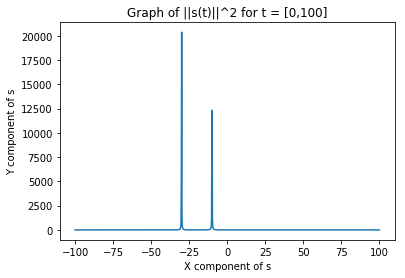